In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
predicoes_cnn = np.array([])
predicoes_svm = np.array([])
predicoes_real= np.array([])

f_path = 'predicoes/'

n = 1404
# Leitura dos resultados salvos em arquivo

# CNN
for i in range(5):
    print(f'Leitura do arquivo:', f'{f_path}predicoes_cnn_fold{i+1}.txt')
    arq_cnn = open(f'{f_path}predicoes_cnn_fold{i+1}.txt')
    arquivo_completo = arq_cnn.read().split('\n')
    for  j in range(len(arquivo_completo)-1):
        aux = arquivo_completo[j].split(';')
        vetor_aux = np.array([])
        for k in aux:
            if k != '':
                vetor_aux = np.append(vetor_aux, float(k))
        if j == 0 and i == 0:
            predicoes_cnn = np.append(predicoes_cnn, vetor_aux)
        else:
            predicoes_cnn = np.vstack((predicoes_cnn, vetor_aux))
    print(f'Fim da leitura do arquivo:', f'{f_path}predicoes_cnn_fold{i+1}.txt')
    arq_cnn.close()

print()
# SVM
for i in range(5):
    print(f'Leitura do arquivo:', f'{f_path}predicoes_svm_fold{i+1}.txt')
    arq = open(f'{f_path}predicoes_svm_fold{i+1}.txt')
    arquivo_completo = arq.read().split('\n')
    for  j in range(len(arquivo_completo)-1):
        aux = arquivo_completo[j].split(';')
        vetor_aux = np.array([])
        for k in aux:
            if k != '':
                vetor_aux = np.append(vetor_aux, float(k))
        if j == 0 and i == 0:
            predicoes_svm = np.append(predicoes_svm, vetor_aux)
        else:
            predicoes_svm = np.vstack((predicoes_svm, vetor_aux))
    print(f'Fim da leitura do arquivo:', f'{f_path}predicoes_svm_fold{i+1}.txt')
    arq.close()

print()
# Real
for i in range(5):
    print(f'Leitura do arquivo:', f'{f_path}predicoes_real_fold{i+1}.txt')
    arq = open(f'{f_path}predicoes_real_fold{i+1}.txt')
    arquivo_completo = arq.read().split('\n')
    for  j in range(len(arquivo_completo)-1):
        aux = arquivo_completo[j].split(';')
        vetor_aux = np.array([])
        for k in aux:
            if k != '':
                vetor_aux = np.append(vetor_aux, float(k))
        if j == 0 and i == 0:
            predicoes_real = np.append(predicoes_real, vetor_aux)
        else:
            predicoes_real = np.vstack((predicoes_real, vetor_aux))
    print(f'Fim da leitura do arquivo:', f'{f_path}predicoes_real_fold{i+1}.txt')
    arq.close()

Leitura do arquivo: predicoes/predicoes_cnn_fold1.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold1.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold2.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold2.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold3.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold3.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold4.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold4.txt
Leitura do arquivo: predicoes/predicoes_cnn_fold5.txt
Fim da leitura do arquivo: predicoes/predicoes_cnn_fold5.txt

Leitura do arquivo: predicoes/predicoes_svm_fold1.txt
Fim da leitura do arquivo: predicoes/predicoes_svm_fold1.txt
Leitura do arquivo: predicoes/predicoes_svm_fold2.txt
Fim da leitura do arquivo: predicoes/predicoes_svm_fold2.txt
Leitura do arquivo: predicoes/predicoes_svm_fold3.txt
Fim da leitura do arquivo: predicoes/predicoes_svm_fold3.txt
Leitura do arquivo: predicoes/predicoes_svm_fold4.txt
Fim da leitura do arquivo

In [4]:
print(np.shape(predicoes_cnn))
print(np.shape(predicoes_svm))
print(np.shape(predicoes_real))

(7020, 15)
(7020, 15)
(7020, 1)


In [5]:
acc_cnn = accuracy_score(predicoes_real, np.argmax(predicoes_cnn, axis=1))
acc_svm = accuracy_score(predicoes_real, np.argmax(predicoes_svm, axis=1))
print("acc_cnn:", acc_cnn)
print("acc_svm:", acc_svm)

acc_cnn: 0.9156695156695157
acc_svm: 0.6417378917378918


In [6]:
def borda_count(svm_preds, cnn_preds):
    # Calcular as bordas para cada classe em cada amostra
    bordas = np.abs(svm_preds - cnn_preds)

    # Determinar a previsão final pela classe com maior borda
    previsoes_finais = np.argmax(bordas, axis=1)

    return previsoes_finais

def soma_simples(svm_preds, cnn_preds):
    preds_compinadas = svm_preds + cnn_preds

    return np.argmax(preds_compinadas, axis=1)

def produto(svm_preds, cnn_preds):
    preds_compinadas = svm_preds * cnn_preds

    return np.argmax(preds_compinadas, axis=1)


def media_simples(svm_preds, cnn_preds):
    # Calcule as previsões combinadas por média simples
    preds_combinadas = (svm_preds + cnn_preds) / 2.0

    # Obtenha as classes preditas usando o argmax
    classes_preditas = np.argmax(preds_combinadas, axis=1)

    return classes_preditas


def media_ponderada(svm_preds, cnn_preds, peso_svm, peso_cnn):
    # Calcule as previsões combinadas por média ponderada
    preds_combinadas = (peso_svm * svm_preds + peso_cnn *
                        cnn_preds) / (peso_svm + peso_cnn)

    # Obtenha as classes preditas usando o argmax
    classes_preditas = np.argmax(preds_combinadas, axis=1)

    return classes_preditas


def maiores_valores(svm_preds, cnn_preds):
    # Realize a fusão selecionando os maiores valores entre as previsões de cada modelo
    fusion_preds = np.maximum(svm_preds, cnn_preds)

    # Obtenha as classes preditas usando o argmax
    classes_preditas = np.argmax(fusion_preds, axis=1)

    return classes_preditas

def maioria_ponderada(svm_preds, cnn_preds, peso_svm, peso_cnn):
    fusion_preds = peso_svm * svm_preds + peso_cnn * cnn_preds

    classes_preditas = np.argmax(fusion_preds, axis=1)

    return classes_preditas

def fusao_com_rejeicao(svm_preds, cnn_preds, limiar_rejeicao=0.4):
    votos_totais = svm_preds + cnn_preds
    previsoes_finais = np.argmax(votos_totais, axis=1)
    confianca = np.max(votos_totais, axis=1)
    previsoes_finais[confianca < limiar_rejeicao] = -1  # Marcando amostras não confiáveis com -1
    return previsoes_finais


In [7]:
nomes_metodos = ['Votação por Borda', 'Soma Simples', 'Produto', 'Média Simples',
                 'Média Ponderada', 'Maiores Valores', 'Maioria Ponderada', 
                 'Fusao com rejeicao']

lista_acuracia = np.array([])

preds_teste = borda_count(predicoes_svm, predicoes_cnn)
print(np.shape(preds_teste))
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_borda_count:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = soma_simples(predicoes_svm, predicoes_cnn)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_soma_simples:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = produto(predicoes_svm, predicoes_cnn)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_produto:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = media_simples(predicoes_svm, predicoes_cnn)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_media_simples:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = media_ponderada(predicoes_svm, predicoes_cnn, 2, 8)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_media_ponderada:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = maiores_valores(predicoes_svm, predicoes_cnn)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_maiores_valores:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = maioria_ponderada(predicoes_svm, predicoes_cnn, 1, 2)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_maioria_ponderada:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

preds_teste = fusao_com_rejeicao(predicoes_svm, predicoes_cnn, limiar_rejeicao=0.8)
acc_aux = accuracy_score(predicoes_real, preds_teste)
print("acc_fusao_com_rejeicao:", acc_aux)
lista_acuracia = np.append(lista_acuracia, acc_aux)

melhor_metodo = np.argmax(lista_acuracia)
melhor_acuracia = lista_acuracia[melhor_metodo]
nome_melhor_metodo = nomes_metodos[melhor_metodo]

print(f'O melhor método é o {nome_melhor_metodo} com acuracia de {melhor_acuracia}')

(7020,)
acc_borda_count: 0.881908831908832
acc_soma_simples: 0.9185185185185185
acc_produto: 0.9245014245014245
acc_media_simples: 0.9185185185185185
acc_media_ponderada: 0.9173789173789174
acc_maiores_valores: 0.9146723646723647
acc_maioria_ponderada: 0.9195156695156695
acc_fusao_com_rejeicao: 0.9032763532763532
O melhor método é o Produto com acuracia de 0.9245014245014245


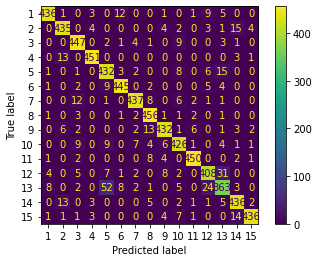

                  precision    recall  f1-score   support

           beach       0.96      0.93      0.95       468
             bus       0.93      0.93      0.93       468
 cafe_restaurant       0.92      0.96      0.94       468
             car       0.97      0.96      0.97       468
     city_center       0.84      0.92      0.88       468
     forest_path       0.94      0.95      0.95       468
   grocery_store       0.95      0.93      0.94       468
            home       0.92      0.97      0.94       468
         library       0.94      0.92      0.93       468
   metro_station       0.91      0.91      0.91       468
          office       0.97      0.96      0.97       468
            park       0.89      0.87      0.88       468
residential_area       0.84      0.78      0.80       468
           train       0.91      0.93      0.92       468
            tram       0.98      0.93      0.95       468

        accuracy                           0.92      7020
       macro

In [23]:
classes = ["beach","bus","cafe_restaurant","car","city_center","forest_path","grocery_store","home","library","metro_station","office","park","residential_area","train","tram"]

predicoes_fusion = produto(predicoes_svm, predicoes_cnn)

predicoes_real_classes = []
predicoes_fusion_classes = []

for i in range(len(predicoes_fusion)):
    predicoes_real_classes.append(classes[int(predicoes_real[i])])
    predicoes_fusion_classes.append(classes[int(predicoes_fusion[i])])

matriz_confusao = confusion_matrix(predicoes_real_classes, predicoes_fusion_classes)
relatorio_classificacao = classification_report(predicoes_real_classes, predicoes_fusion_classes)
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=range(1, 16))

cm_display.plot()
plt.show()

print(relatorio_classificacao)